## _*Quantum SVM (variational method)*_

The SVM_QKernel notebook here demonstrated a kernel based approach. This notebook shows a variational method.

For further information please see: [https://arxiv.org/pdf/1804.11326.pdf](https://arxiv.org/pdf/1804.11326.pdf)


**This notebook shows the SVM implementation based on the variational method.**

In [1]:
import os
import sys
from datasets import *
from qiskit_acqua.svm.data_preprocess import *
from qiskit_acqua.input import get_input_instance
from qiskit_acqua import run_algorithm

First we prepare the dataset, which is used for training, testing and the finally prediction.

*Note: You can easily switch to a different dataset, such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.*

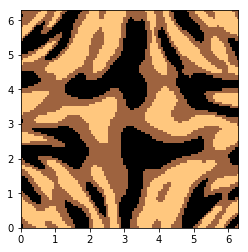

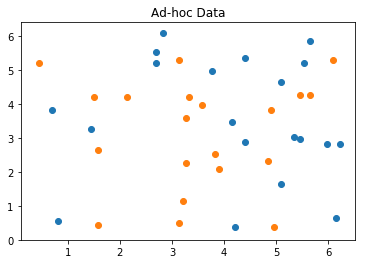

In [2]:
sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=20, test_size=10, n=2, gap=0.3, PLOT_DATA=True)
#n=2 is the dimension of each data point
total_array, label_to_labelclass = get_points(test_input, class_labels)

With the dataset ready we initialize the necessary inputs for the algorithm:
- the input dictionary (params) 
- the input object containing the dataset info (algo_input).

In [3]:
params = {
    'problem': {'name': 'svm_classification'},
    'backend': {'name': 'local_qasm_simulator', 'shots': 1000},
    'algorithm': {
        'name': 'SVM_Variational',
        'circuit_depth': 3,
        'print_info': True
    },
    'optimizer': {
        'name': 'SPSA',
        'save_steps': 10,
        'max_trials': 200,  #critical!!!  ideal: >200
    }
}

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset  = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = total_array

With everything setup, we can now run the algorithm.

For the testing, the result includes the details and the success ratio.

For the prediction, the result includes the predicted labels. 

In [4]:
result = run_algorithm(params,algo_input)
print(result)



Classifying point [4.0212386  2.82743339]. Label should be  A 

Measured label probability distribution is {'A': 0.71, 'B': 0.29} 

Assigned label is  A  CORRECT 



Classifying point [4.33539786 5.65486678]. Label should be  A 

Measured label probability distribution is {'A': 0.966, 'B': 0.034} 

Assigned label is  A  CORRECT 



Classifying point [1.0681415  4.52389342]. Label should be  A 

Measured label probability distribution is {'A': 0.794, 'B': 0.20600000000000002} 

Assigned label is  A  CORRECT 



Classifying point [6.22035345 0.56548668]. Label should be  A 

Measured label probability distribution is {'A': 0.913, 'B': 0.08700000000000001} 

Assigned label is  A  CORRECT 



Classifying point [5.59203492 3.01592895]. Label should be  A 

Measured label probability distribution is {'A': 0.786, 'B': 0.214} 

Assigned label is  A  CORRECT 



Classifying point [2.32477856 2.63893783]. Label should be  A 

Measured label probability distribution is {'A': 0.779, 'B': 0.221} 